## Radiology 229 - Class 9 Exercises (Lectures 9A-D)

This class notebook is built (in part) from the Matlab folder, Lecture9.mlx. 

Objectives:
1) Balanced SSFP
2) Gradient-Spoiling
3) RF Spoiling

First we import basic libraries including  <code>mrsigpy</code>.


In [1]:
# -- We use the functions in mrsigpy, as well as standard numpy and matpltlib
import numpy as np
import mrsigpy as mrs
import matplotlib.pyplot as plt
#from PIL import Image


# Single Simulation of Gradient Echo Sequences
The <code>epg_gradecho</code> function can simulate the magnetization toward steady state, with different spoiling variations.  For example, we know that balanced SSFP with T2 almost as large as T1 and a 90$^\circ$ flip angle shoudl give a signal around 0.5$m_0$:

(1, 200)

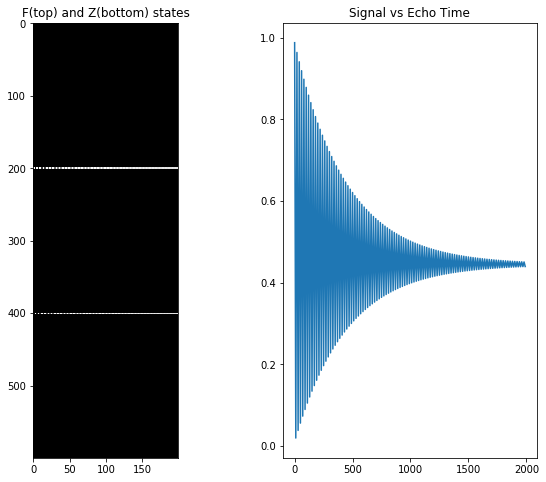

In [2]:
s = mrs.epg_gradecho(90,T1=500,T2=400,TR=10,TE=5,gspoil=0,num_reps=200)

np.shape(s)

Note that there are no EPG states other than F0 and Z0 here, as there are no gradients!

Examine the core of the function to see how the EPG code is used.

# balanced SSFP:  Signal vs Frequency

/Users/brian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


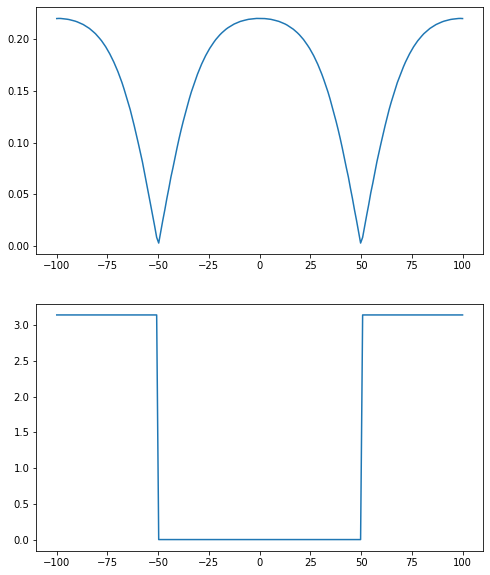

In [5]:

TR=10       # ms
TE=5        # ms
freq_range = np.linspace(-1000/TR,1000/TR,200)
sig = np.zeros((len(freq_range),1))

for freqnum in np.arange(len(freq_range)):
    s = mrs.epg_gradecho(flipangle=60,TR=TR,TE=TE,delta_freq=freq_range[freqnum],plot=False)
    sig[freqnum,0]=s[0,-1]

#s = mrs.epg_gradecho()
#print(s[0,-1])
    
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(freq_range,np.abs(sig),label='Magnitude')
plt.subplot(2,1,2)
plt.plot(freq_range,np.angle(sig),label='phase')
plt.show()


